In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [4]:
import os
import pandas as pd

folder_path = 'D:/OneDrive_2024-12-27/Segmented by seperating spindles/Balanced_segmented/'


file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.xlsx')]

X_list, y_list = [], []

for file_path in file_paths:
    data = pd.read_excel(file_path)
    X_list.append(data.iloc[:, :-1].values)  
    y_list.append(data.iloc[:, -1].values) 

X = np.vstack(X_list)
y = np.hstack(y_list)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled_reshaped, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)


In [7]:
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(200, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,  
    batch_size=32,
    verbose=1
)


Epoch 1/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8708 - loss: 0.3178 - val_accuracy: 0.9210 - val_loss: 0.2204
Epoch 2/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9383 - loss: 0.1750 - val_accuracy: 0.9488 - val_loss: 0.1420
Epoch 3/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9545 - loss: 0.1343 - val_accuracy: 0.9680 - val_loss: 0.1025
Epoch 4/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9614 - loss: 0.1101 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 5/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9677 - loss: 0.0941 - val_accuracy: 0.9749 - val_loss: 0.0769
Epoch 6/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9705 - loss: 0.0882 - val_accuracy: 0.9813 - val_loss: 0.0626
Epoch 7/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9755 - loss: 0.0726 - val_accuracy: 0.9813 - val_loss: 0.0524
Epoch 8/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9778 - loss: 0.0647 - val_accuracy: 0.

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0362
Test Accuracy: 0.9883


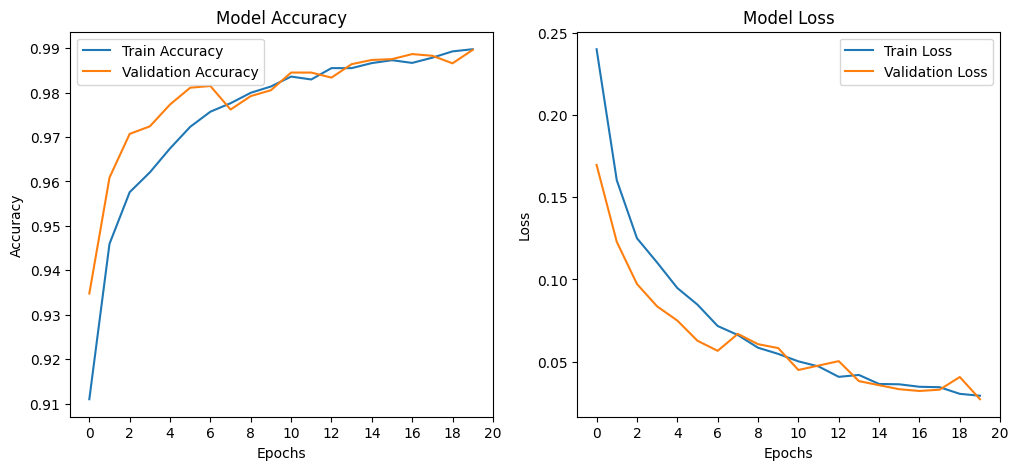

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.xticks(ticks=range(0, len(history.history['accuracy']) + 1, 2))  # Ticks at 0, 2, 4, ...

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.xticks(ticks=range(0, len(history.history['loss']) + 1, 2))  # Ticks at 0, 2, 4, ...

plt.show()


166/166 [==============================] - 1s 4ms/step


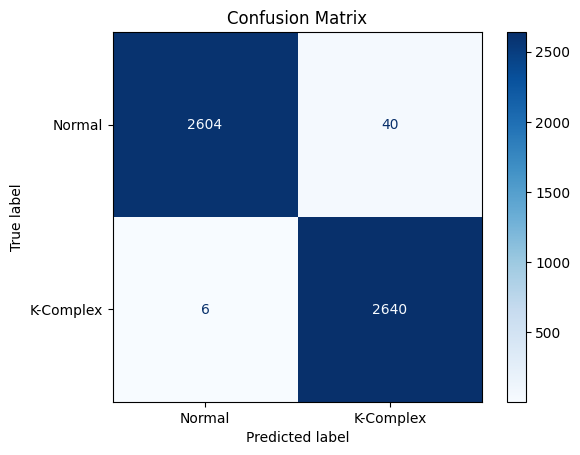

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99      2644
   K-Complex       0.99      1.00      0.99      2646

    accuracy                           0.99      5290
   macro avg       0.99      0.99      0.99      5290
weighted avg       0.99      0.99      0.99      5290



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'K-Complex'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, y_pred_classes, target_names=['Normal', 'K-Complex'])
print("Classification Report:")
print(report)


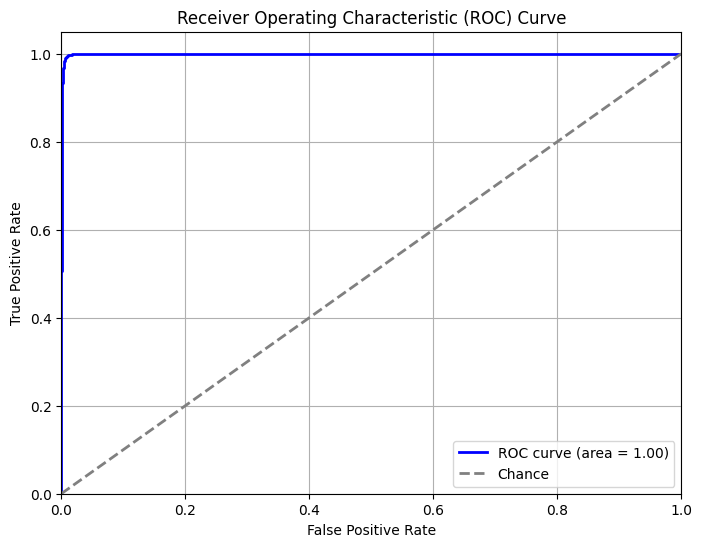

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_cat[:, 1], y_pred[:, 1])  # ROC for the positive class (K-Complex)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
